In [94]:
#open era - 1968

import numpy as np
import pandas as pd
from ipywidgets import widgets, interactive
import seaborn as sns
import scipy
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import matplotlib.patches as mpatches
import squarify    # pip install squarify (algorithm for treemap)

In [ ]:
# second half of 2003-to early 2020

# weeks at number 1
# map of world with countries from tournaments where the three have won
# title count
# grand slam count - percent of slams won since 2004
# masters title count. If you include Andy Murray, ... 
# this is with the consideration that there were other high-caliber players such as Andy Roddick, Stanislas Wawrinka,
    # Juan Martin Del-Potro, and fighting back the younger tier as they have been moving into their 30s
# count of grand slams since 2004 - Federer - 19, Nadal - 19, Djokovic - 17, Murray - 3, Wawrinka - 3, 
    # Del Potro - 1, Cilic - 1, Safin - 1, Gaudio - 1
    # 65 total majors
# weeks at #1 since 2004 

#types of graphs
    # world map? countries where they have won tournaments - look into choro
    # bar plot? compare grand slams 
    # stacked bar chart comparing composition of titles
    # circle pie chart? 
        # losses in grand slams and others
            # losses to big three vs others
    # compare losses to other big 3 vs all other players
    # number of times in open era anyone has won 3+ majors in the same year 
    
# count matches played at each grand slam, divy by grand slam and by win/loss
# infographic on clutch matches: win-rate in three-setters for best of 3, and five-setters for best of five,
# coming back from a set down / two-sets down
# lineplot to showcase the race for grandslam glory
# success of top pros into their 30s - weird revelation
    # scrape birthdates of each, maybe 

## Visualizing the Dominance of the Big 3

When we think of dynasties in sports, each person may have a couple that come to mind: The MJ-led Chicago Bulls in the 1990s, the New England Patriots with Bill Belichick and Tom Brady, the New York Yankees during the time of Babe Ruth, the Nick Saban-led Alabama football program, and so many more. Tennis historians may even consider the dominance of Rod Laver. 

However, when we expand the definition of a "dynasty" to include two or three other teams/players of a sport, the trio of Roger Federer, Rafael Nadal and Novak Djokovic deserves to be brought almost to the forefront of that debate, if they don't deserve to individually be considered dynastic. The dominance that this trio has showcased since July 2003, when Federer won his first grand slam, is ridiculous, considering that all three have been competing against each other for major titles for more than a decade.

In this project, we visualize the qualities of these three players' careers that showcase how remarkable their dominance over the sport of tennis has been. This argument will be using lots of words, but in the form of pictures.

### Load Data

We will start off with loading our data, which we processed in a separate notebook. Let's also create dataframes of data for each of the big three by running the cell after that.

In [213]:
atpmatches = pd.read_csv("atpmatches_clean.csv", low_memory = False)

In [3]:
fed = atpmatches[((atpmatches["winner_name"] == "Roger Federer") | (atpmatches["loser_name"] == "Roger Federer"))]
rafa = atpmatches[((atpmatches["winner_name"] == "Rafael Nadal") | (atpmatches["loser_name"] == "Rafael Nadal"))]
novak = atpmatches[((atpmatches["winner_name"] == "Novak Djokovic") | (atpmatches["loser_name"] == "Novak Djokovic"))]

### Win/Loss Ratios

The cell below will be able to show us a distribution over the years of Federer's win/loss ratio

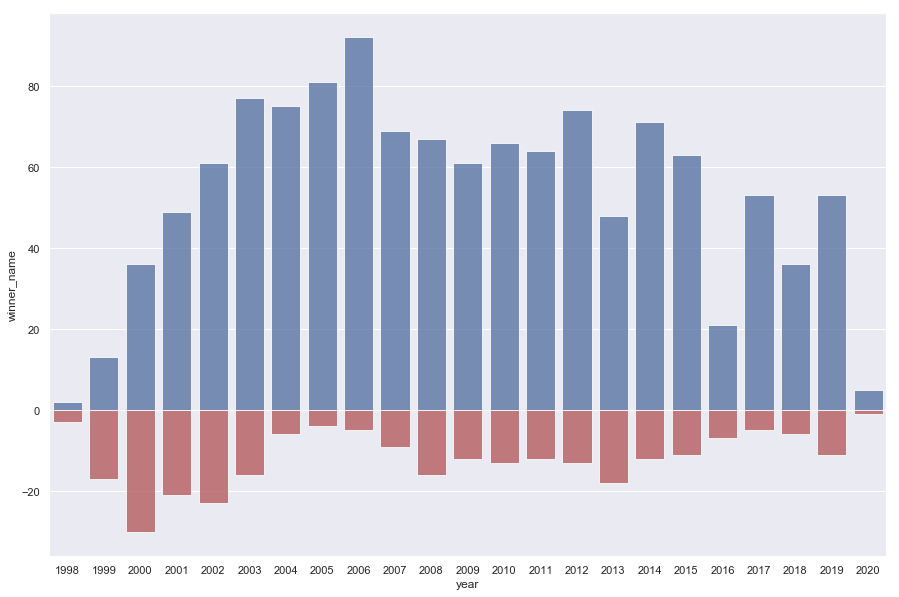

In [148]:
sns.set(rc={'figure.figsize':(15,10)})
fed_wins = fed[fed["winner_name"] == "Roger Federer"].groupby("year").agg({"winner_name": "count"}).reset_index()
fed_loss = fed[fed["loser_name"] == "Roger Federer"].groupby("year").agg({"winner_name": "count"}).reset_index()
fed_loss["winner_name"] *= -1
sns.barplot(x = "year", y = 'winner_name', data = fed_wins, color = "b", alpha = 0.8)
sns.barplot(x = "year", y = "winner_name", data = fed_loss, color = "r", alpha = 0.8)
plt.show()
#fed_wins

Based on the code in the code block above, let's create a function, "win_loss", that will be able to show us the win/loss ratios of any player that we put in.

In [149]:
def win_loss(player):
    df_win = atpmatches[(atpmatches["winner_name"] == player)]
    df_loss = atpmatches[(atpmatches["loser_name"] == player)]
    df_wins = df_win.groupby("year").agg({"winner_name": "count"}).reset_index()
    df_losses = df_loss.groupby("year").agg({"winner_name": "count"}).reset_index()
    df_losses["winner_name"] *= -1
    sns.set()
    sns.barplot(x = "year", y = 'winner_name', data = df_wins, color = "b", alpha = 0.8)
    sns.barplot(x = "year", y = "winner_name", data = df_losses, color = "r", alpha = 0.8)
    plt.title("Wins/Losses for " + player + " by Year")
    plt.show()

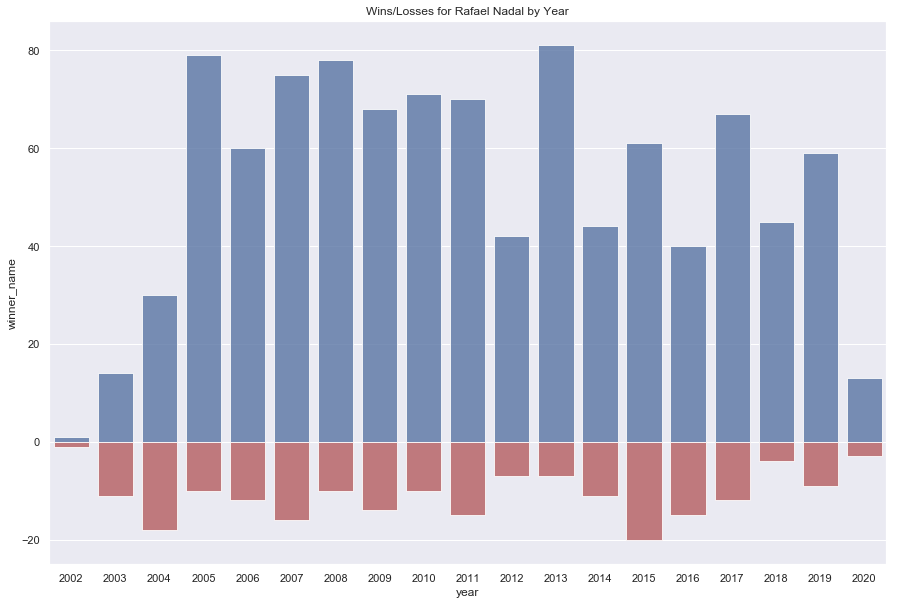

In [150]:
win_loss("Rafael Nadal")

In [325]:
def win_loss_comp(players):
    wins = pd.DataFrame()
    losses = pd.DataFrame()
    for player in players:
        df_win = atpmatches[(atpmatches["winner_name"] == player)]
        df_loss = atpmatches[(atpmatches["loser_name"] == player)]
        df_wins = df_win.groupby("year").agg({"winner_name": "count"}).reset_index()
        df_losses = df_loss.groupby("year").agg({"winner_name": "count"}).reset_index()
        df_losses["winner_name"] *= -1
        df_wins["Player"] = player
        df_losses["Player"] = player
        if len(set(df_wins["year"]) - set(df_losses["year"])) > 0:
            for year in set(df_wins["year"]) - set(df_losses["year"]):
                df_losses = df_losses.append({'year': year, 'winner_name': 0, "Player": player}, ignore_index=True)
        if len(set(df_losses["year"]) - set(df_wins["year"])) > 0:
            for year in set(df_losses["year"]) - set(df_wins["year"]):
                df_wins = df_wins.append({'year': year, 'winner_name': 0, "Player": player}, ignore_index=True)
        wins = wins.append(df_wins)
        losses = losses.append(df_losses)
    #sns.set()
    sns.barplot(x = "year", y = 'winner_name', data = wins, hue = "Player")
    sns.barplot(x = "year", y = "winner_name", data = losses, hue = "Player")
    #plt.title("Wins/Losses for " + player + " by Year")
    plt.show()

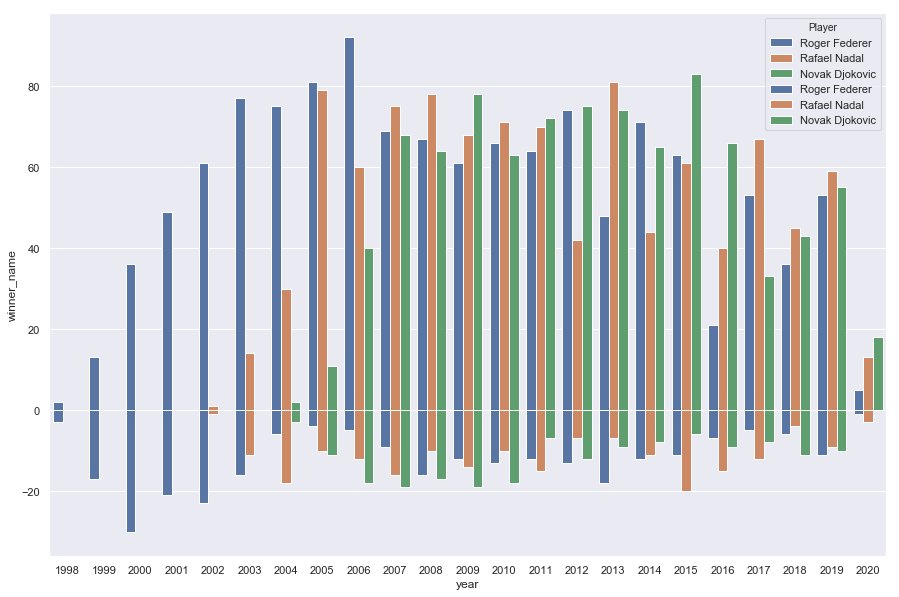

In [326]:
win_loss_comp(["Roger Federer", "Rafael Nadal", "Novak Djokovic"])

### Title Count

#### Total Titles

In [599]:
def title_count(player, title_type = None, color = None):
    if title_type is not None:
        player_df = atpmatches[(atpmatches["winner_name"] == player) &  (atpmatches["tourney_level"] == title_type) &
                           (atpmatches["round"] == "F")].groupby("year").agg({"tourney_name": 'count'}).reset_index()
    else:
        player_df = atpmatches[(atpmatches["winner_name"] == player) & 
                           (atpmatches["round"] == "F")].groupby("year").agg({"tourney_name": 'count'}).reset_index()
    years = set(range(min(player_df["year"]), max(player_df["year"]) + 1))
    if len(years - set(player_df["year"])) > 0:
        for year in years - set(player_df["year"]):
                player_df = player_df.append({'year': year, 'tourney_name': 0, "Player": player}, ignore_index=True)
    player_df["Player"] = player
    if color is not None:
        sns.barplot(x = "year", y = 'tourney_name', data = player_df, color = color, alpha = 0.8)
    else:
        sns.barplot(x = "year", y = 'tourney_name', data = player_df)

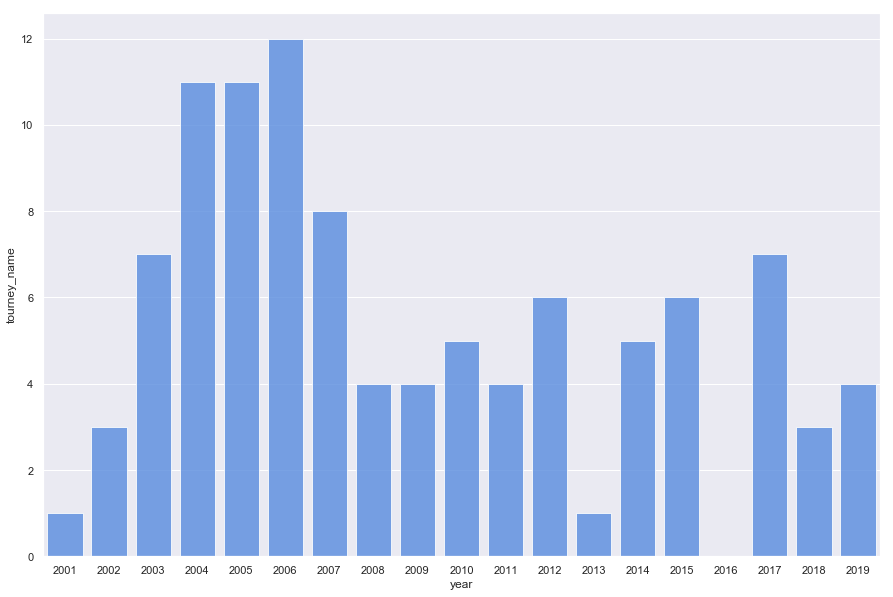

In [600]:
title_count("Roger Federer", color = "#4285F4")

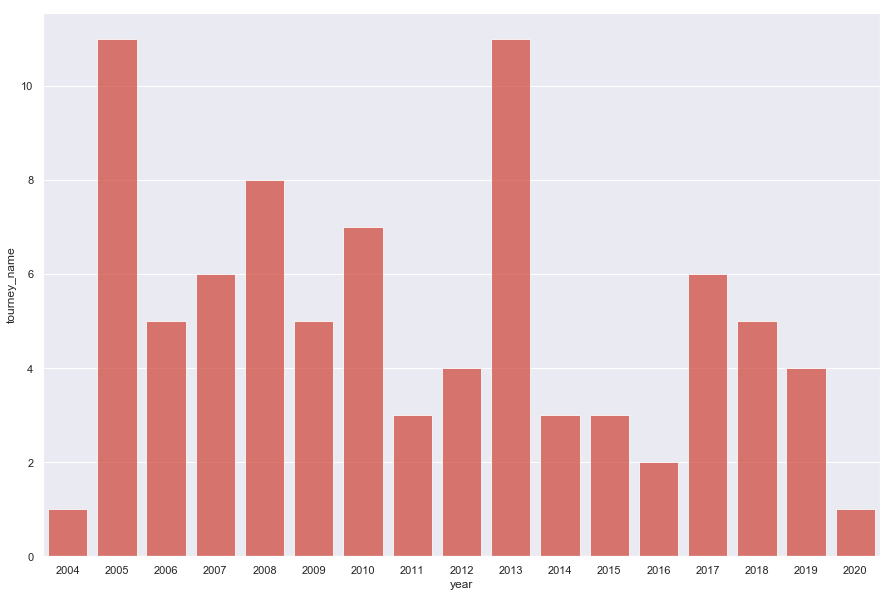

In [601]:
title_count("Rafael Nadal", color = '#EA4335')

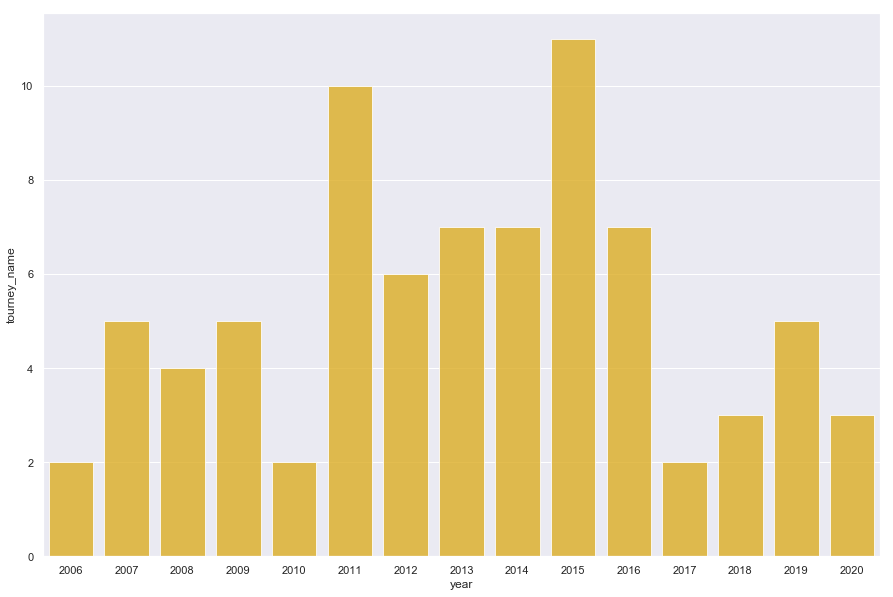

In [602]:
title_count("Novak Djokovic", color = '#FBBC05')

Something that you will notice that is interesting is that, though winning a lot of titles can often correlate to a dominance on the tour (and it definitely does to a degree), it doesn't necessarily translate to the dominance in the big events, such as grand slams.

An example of this, for Nadal, in 2005, he won 11 titles, which is a huge amount. That year included his first grand slam at the French Open, ending the year at number 2. Meanwhile, in 2013, he also won 11 titles. However, in 2013, he won two grand slams and ended the year number 1. Even pulling the example of 2010, where he won 4 less titles, he won three grand slams.

Another example, for Federer, he only won four titles in 2009, the year that he eclipsed Pete Sampras to the be record holder for grand slams won by a male tennis player. However, in 2009, both Djokovic and Nadal won more titles than Federer. A good portion of the year end rankings has to do with the fact that Nadal lost at the French Open and did not play Wimbledon.

In [327]:
def combined_title_count(players, title_type = None):
    player_df = pd.DataFrame()
    for player in players:
        if title_type is not None:
            df = atpmatches[(atpmatches["winner_name"] == player) &  (atpmatches["tourney_level"] == title_type) &
                           (atpmatches["round"] == "F")].groupby("year").agg({"tourney_name": 'count'}).reset_index()
            player_df = player_df.append(df)
        else:
            df = atpmatches[(atpmatches["winner_name"] == player) &
                           (atpmatches["round"] == "F")].groupby("year").agg({"tourney_name": 'count'}).reset_index()
            player_df = player_df.append(df)
    #player_df = player_df.groupby("year").agg({"tourney_name": 'count'}).reset_index()
    
    player_df = player_df.groupby("year").agg({"tourney_name": sum}).reset_index()
    years = set(range(min(player_df["year"]), max(player_df["year"]) + 1))
    if len(years - set(player_df["year"])) > 0:
        for year in years - set(player_df["year"]):
                player_df = player_df.append({'year': year, 'tourney_name': 0, "Player": player}, ignore_index=True)
    player_df["Player"] = player
    sns.barplot(x = "year", y = 'tourney_name', data = player_df)

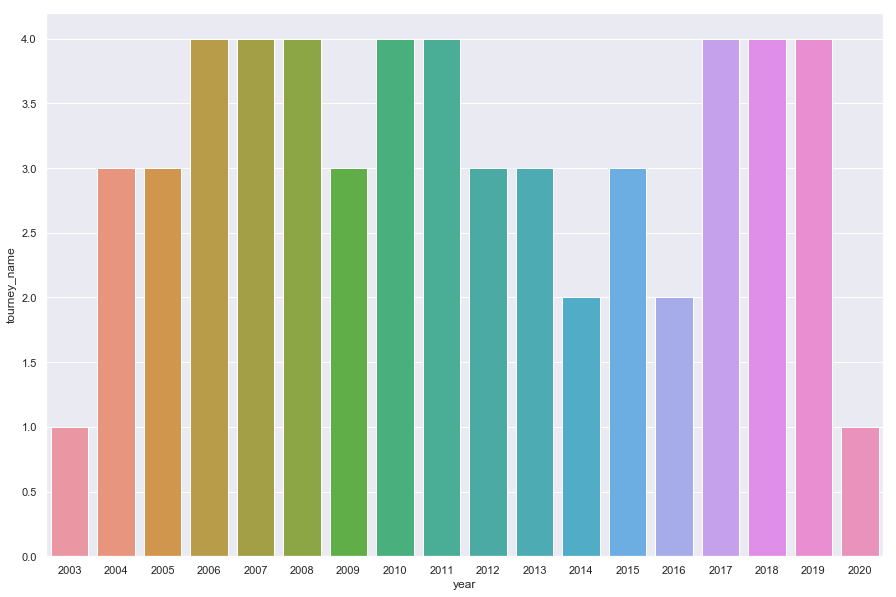

In [328]:
# a multi-bar barplot is probably better
combined_title_count(["Roger Federer", "Rafael Nadal", "Novak Djokovic"], title_type = "G")

#### Grand Slam Title Counts

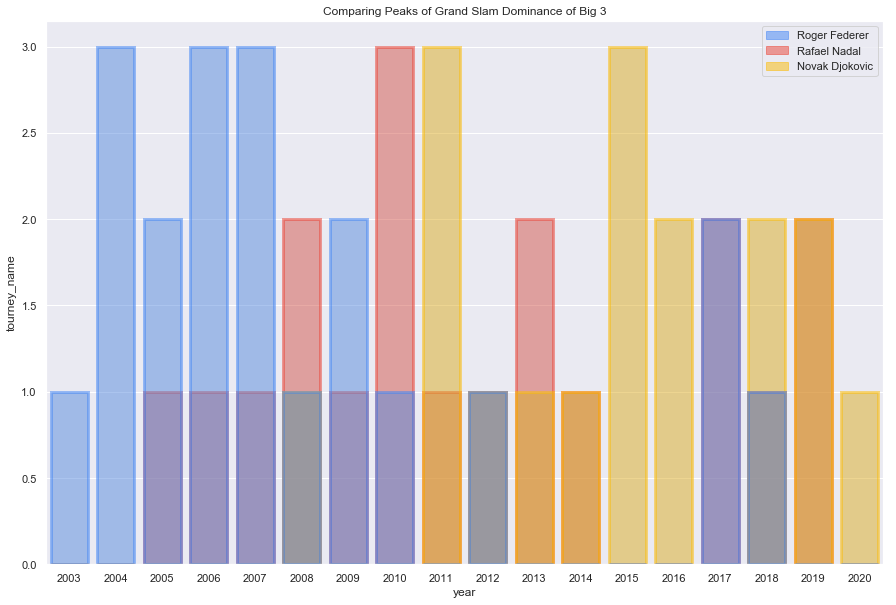

In [488]:
per_year_plot_title_count("Rafael Nadal", title_type = "G", color = '#EA4335')
per_year_plot_title_count("Novak Djokovic", title_type = "G", color = '#FBBC05')
per_year_plot_title_count("Roger Federer", title_type = "G", color = '#4285F4')

# allows to see color associated with each player
fed_patch = mpatches.Patch(color='#4285F4', label='Roger Federer', alpha = 0.5)
nad_patch = mpatches.Patch(color='#EA4335', label='Rafael Nadal', alpha = 0.5)
djo_patch = mpatches.Patch(color='#FBBC05', label='Novak Djokovic', alpha = 0.5)
plt.legend(handles=[fed_patch, nad_patch, djo_patch])
plt.title("Comparing Peaks of Grand Slam Dominance of Big 3")
plt.show()

#plt.legend(labels=['Rafael Nadal', 'Novak Djokovic', 'Roger Federer'])
#plt.xticks(np.arange(2000, 2020+1, 1.0))
#plt.show()
#change plot to instead of pointy, to look like bars

In [518]:
# plot of grand slam counts for each grandslam
def grandslam_count(gs, big3 = True, limit = 0, ax = None):
    if gs not in ["Australian Open", "Roland Garros", "Wimbledon", "US Open"]:
        return("Must use one of: Australian Open, Roland Garros, Wimbledon, US Open")
    if big3 == False:
        years = [1968, 2020]
    else:
        if gs == "Australian Open":
            years = [2004, 2020]
        elif gs == "Roland Garros":
            years = [2004, 2020]
        else:
            years = [2003, 2019]
    data = atpmatches[(atpmatches["tourney_name"] == gs) & (atpmatches["year"] >= years[0]) & 
                      (atpmatches["year"] <= years[1]) & (atpmatches["round"] == "F")].groupby(
                        "winner_name").agg({"winner_id": 'count'}).reset_index().sort_values(
                    "winner_id", ascending = False)
    data = data.rename(columns={"winner_name": "Name", "winner_id": "Titles"})
    if limit > 0:
        data = data.head(limit)
    clrs = []
    for player in data.Name:
        if player == "Roger Federer":
            clrs.append('#4285F4') 
        elif player == "Rafael Nadal":
            clrs.append('#EA4335')
        elif player == "Novak Djokovic":
            clrs.append('#FBBC05')
        else:
            clrs.append('grey')
    #clrs = ['#4285F4' if (x == "Roger Federer") else 'grey' for x in data.winner_name]
    #clrs = ['#EA4335' if (x == "Rafael Nadal") else 'for x in data.winner_name]
    if ax is not None:
        sns.barplot(x = "Titles", y = "Name", data = data, palette = clrs, alpha = 0.8, ax = ax)
        ax.grid()
        ax.set_title(gs, fontsize = 20)
        ax.set_ylabel(" ")
    else:
        sns.barplot(x = "Titles", y = "Name", data = data, palette = clrs, alpha = 0.8)
    return data

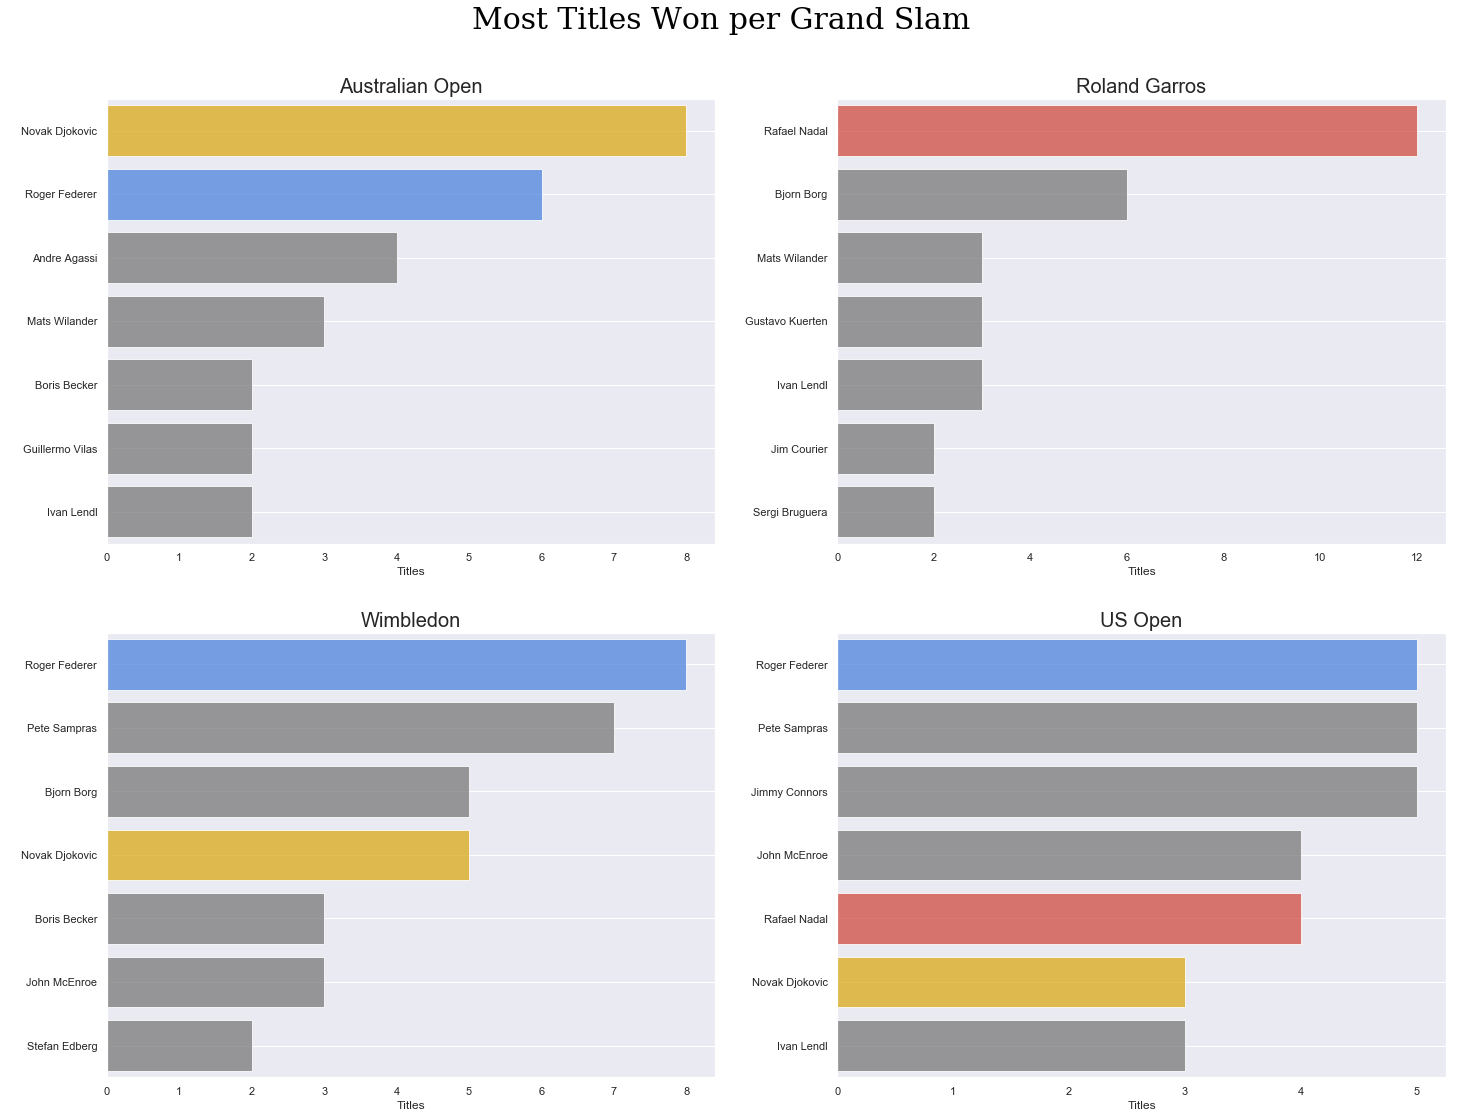

In [519]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
fig, ax = plt.subplots(2,2, figsize = (24, 18))
gses = ["Australian Open", "Roland Garros", "Wimbledon", "US Open"]
for i in range(4):
    grandslam_count(gses[i], False, 7, ax[(i // 2)][(i%2)])
    
plt.text(-1, -10, "Most Titles Won per Grand Slam",
         horizontalalignment='center',
         fontdict = font,
         fontsize=30)
plt.show()

#### Masters Titles Won

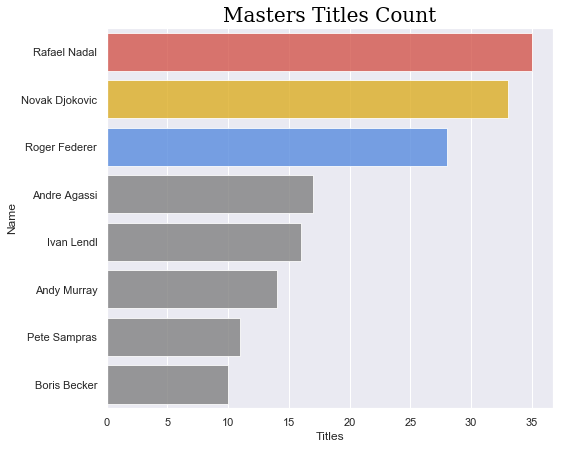

In [513]:
masters = atpmatches[(atpmatches["tourney_level"] == "M") & (atpmatches["year"] >= 1968) & 
                      (atpmatches["year"] <= 2020) & (atpmatches["round"] == "F")].groupby(
                        "winner_name").agg({"winner_id": 'count'}).reset_index().sort_values(
                        "winner_id", ascending = False).head(8)
masters = masters.rename(columns={"winner_name": "Name", "winner_id": "Titles"})
clrs = []
for player in masters.Name:
    if player == "Roger Federer":
        clrs.append('#4285F4') 
    elif player == "Rafael Nadal":
        clrs.append('#EA4335')
    elif player == "Novak Djokovic":
        clrs.append('#FBBC05')
    else:
        clrs.append('grey')
plt.figure(figsize = (8, 7))
sns.barplot(x = "Titles", y = "Name", data = masters, palette = clrs, alpha = 0.8)
plt.title("Masters Titles Count", fontsize = 20, fontdict = font)
plt.show()

### Head-to-Head Records

#### Among Each Other

In [400]:
big3 = ["Novak Djokovic", "Rafael Nadal", "Roger Federer"]

def head_to_head(player1, player2, grand_slam = True):
    return [len(atpmatches[(atpmatches["tourney_level"] == "G") & 
          (atpmatches["winner_name"] == player1) & (atpmatches["loser_name"] == player2)]),
            len(atpmatches[(atpmatches["tourney_level"] == "G") & 
          (atpmatches["winner_name"] == player2) & (atpmatches["loser_name"] == player1)])]

head_to_head("Roger Federer", "Rafael Nadal")

#big3gs = atpmatches[(atpmatches["tourney_level"] == "G") & 
#          (atpmatches["winner_name"].isin(big3)) & (atpmatches["loser_name"].isin(big3))][
#    ["year", "winner_name", "loser_name", "tourney_name", "round"]]

[4, 10]

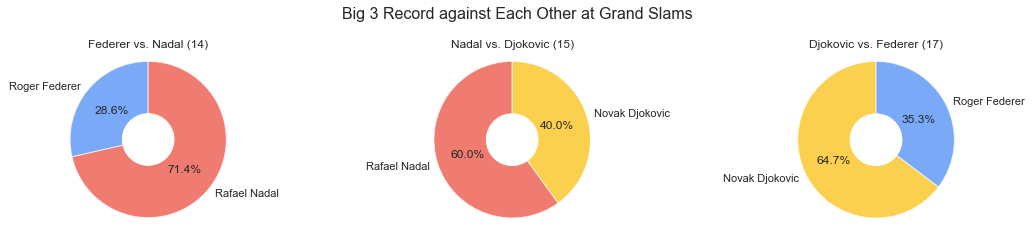

In [490]:
colores = ['#4285F4','#EA4335', '#FBBC05']

fig1, ax1 = plt.subplots(1, 3, figsize=(15,3.5))
ax1[0].pie(head_to_head("Roger Federer", "Rafael Nadal"), colors = [colores[0], colores[1]], labels=["Roger Federer", "Rafael Nadal"], 
           autopct='%1.1f%%', startangle=90, wedgeprops={'alpha':0.7})
ax1[0].pie(top_ten_record("Roger Federer"), radius=0.33, colors= "w")
ax1[0].title.set_text("Federer vs. Nadal (" + str(sum(head_to_head("Roger Federer", "Rafael Nadal"))) + ")")
ax1[1].pie(head_to_head("Rafael Nadal", "Novak Djokovic"), colors = [colores[1], colores[2]], labels=["Rafael Nadal", "Novak Djokovic"], 
           autopct='%1.1f%%', startangle=90, wedgeprops={'alpha':0.7})
ax1[1].pie(top_ten_record("Rafael Nadal"), radius=0.33, colors= "w")
ax1[1].title.set_text('Nadal vs. Djokovic (' + str(sum(head_to_head("Rafael Nadal", "Novak Djokovic"))) + ")")
ax1[2].pie(head_to_head("Novak Djokovic", "Roger Federer"), colors = [colores[2], colores[0]], labels=["Novak Djokovic", "Roger Federer"], 
           autopct='%1.1f%%', startangle=90, wedgeprops={'alpha':0.7})
ax1[2].pie(top_ten_record("Novak Djokovic"), radius=0.33, colors= "w")
ax1[2].title.set_text('Djokovic vs. Federer (' + str(sum(head_to_head("Novak Djokovic", "Roger Federer"))) + ")")
#draw circle

#fig1 = plt.gcf()
#fig1.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1[0].axis('equal')  
ax1[1].axis('equal')
ax1[2].axis('equal')
fig1.suptitle('Big 3 Record against Each Other at Grand Slams', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()

For a lot of the talk about Federer and Nadal's rivalry, as well as the epic encounters between Nadal and Djokovic, surprisingly, the most prominent matchup between these three is Djokovic and Federer. Often times, they were slated to face each other in semifinals, and many grand slam finals have showcased Federer and Djokovic. Overall, Federer doesn't match up as well against his younger compatriots at the slams, while Nadal has a slight edge over Djokovic.

#### Top 10 Record

In [441]:
def top_ten_record(player, grand_slam = False):
    if grand_slam == True:
        wins = atpmatches[(atpmatches["winner_name"] == player) & (atpmatches["tourney_level"] == "G") &
                         (atpmatches["loser_rank"] <= 10)]
        losses = atpmatches[(atpmatches["loser_name"] == player) & (atpmatches["tourney_level"] == "G") &
                         (atpmatches["winner_rank"] <= 10)]
    else:
        wins = atpmatches[(atpmatches["winner_name"] == player) & (atpmatches["loser_rank"] <= 10)]
        losses = atpmatches[(atpmatches["loser_name"] == player) & (atpmatches["winner_rank"] <= 10)]
    return [len(wins), len(losses)]

top_ten_record("Ernests Gulbis", True)

[8, 9]

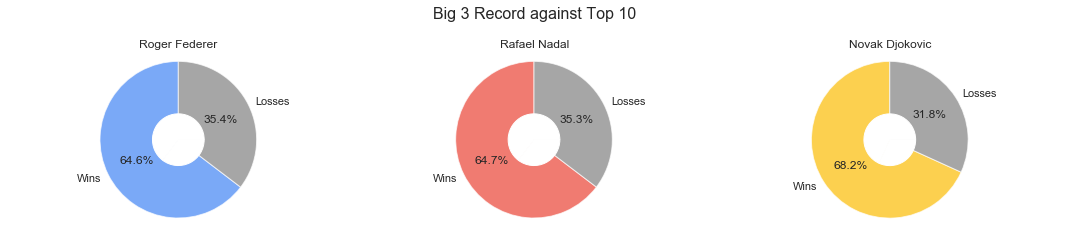

In [401]:
colores = ['#4285F4','#EA4335', '#FBBC05']

fig1, ax1 = plt.subplots(1, 3, figsize=(15,3.5))
ax1[0].pie(top_ten_record("Roger Federer"), colors = [colores[0], 'grey'], labels=["Wins", "Losses"], 
           autopct='%1.1f%%', startangle=90, wedgeprops={'alpha':0.7})
ax1[0].pie(top_ten_record("Roger Federer"), radius=0.33, colors= "w")
ax1[0].title.set_text('Roger Federer')
ax1[1].pie(top_ten_record("Rafael Nadal"), colors = [colores[1], 'grey'], labels=["Wins", "Losses"], 
           autopct='%1.1f%%', startangle=90, wedgeprops={'alpha':0.7})
ax1[1].pie(top_ten_record("Rafael Nadal"), radius=0.33, colors= "w")
ax1[1].title.set_text('Rafael Nadal')
ax1[2].pie(top_ten_record("Novak Djokovic"), colors = [colores[2], 'grey'], labels=["Wins", "Losses"], 
           autopct='%1.1f%%', startangle=90, wedgeprops={'alpha':0.7})
ax1[2].pie(top_ten_record("Novak Djokovic"), radius=0.33, colors= "w")
ax1[2].title.set_text('Novak Djokovic')
#draw circle

#fig1 = plt.gcf()
#fig1.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1[0].axis('equal')  
ax1[1].axis('equal')
ax1[2].axis('equal')
fig1.suptitle('Big 3 Record against Top 10', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()

#### Composition of Losses

A potential avenue to look at is to see who beats these players at grand slams. 

In [383]:
def count_losses(player, grand_slam = False):
    if grand_slam == True:
        losses = atpmatches[(atpmatches["loser_name"] == player) & (atpmatches["tourney_level"] == "G")]
    else:
        losses = atpmatches[atpmatches["loser_name"] == player]
    three_names = ["Novak Djokovic", "Rafael Nadal", "Roger Federer"]
    big_three = losses[losses["winner_name"].isin(three_names)]
    others = losses[~losses["winner_name"].isin(three_names)]
    print(player)
    print("Losses to Big 3:", len(big_three))
    print("Losses to Other:", len(others))
    print("Number of Losses to Players Besides Big 3:", len(others["winner_name"].unique()))
    ot = others.groupby("winner_name").agg({"winner_id": 'count'}).reset_index()
    print("Number of Other Players with more than 1 win:", len(ot[ot["winner_id"] > 1].winner_name.values))

In [384]:
count_losses("Novak Djokovic", grand_slam = True)
count_losses("Rafael Nadal", grand_slam = True)
count_losses("Roger Federer", grand_slam = True)

Novak Djokovic
Losses to Big 3: 15
Losses to Other: 28
Number of Losses to Players Besides Big 3: 21
Number of Other Players with more than 1 win: 5
Rafael Nadal
Losses to Big 3: 10
Losses to Other: 30
Number of Losses to Players Besides Big 3: 25
Number of Other Players with more than 1 win: 5
Roger Federer
Losses to Big 3: 21
Losses to Other: 38
Number of Losses to Players Besides Big 3: 32
Number of Other Players with more than 1 win: 6


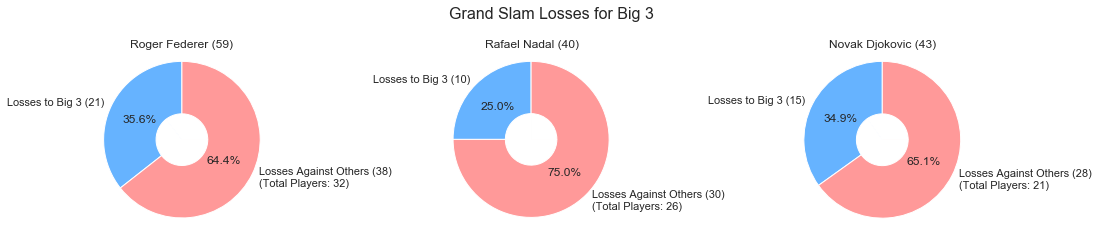

In [491]:
label_fed = ['Losses to Big 3 (21)', 'Losses Against Others (38) \n(Total Players: 32)']
label_nad = ['Losses to Big 3 (10)', 'Losses Against Others (30) \n(Total Players: 26)']
label_djo = ['Losses to Big 3 (15)', 'Losses Against Others (28) \n(Total Players: 21)']
sizes1 = [15, 28]
sizes2 = [10, 30]
sizes3 = [21, 38]
#colors
colors = ['#66b3ff', '#ff9999']
 
fig1, ax1 = plt.subplots(1, 3, figsize=(15,3.5))
ax1[0].pie(sizes3, colors = colors, labels=label_fed, autopct='%1.1f%%', startangle=90)
#creates middle white circle to turn pie chart into donut chart
ax1[0].pie(sizes3, radius=0.33, colors= "w")
ax1[0].title.set_text('Roger Federer (' + str(sum(sizes3)) + ")")
ax1[1].pie(sizes2, colors = colors, labels=label_nad, autopct='%1.1f%%', startangle=90)
ax1[1].pie(sizes2, radius=0.33, colors= "w")
ax1[1].title.set_text('Rafael Nadal (' + str(sum(sizes2)) + ")")
ax1[2].pie(sizes1, colors = colors, labels=label_djo, autopct='%1.1f%%', startangle=90)
ax1[2].pie(sizes1, radius=0.33, colors= "w")
ax1[2].title.set_text('Novak Djokovic (' + str(sum(sizes1)) + ")")

#draw circle

#fig1 = plt.gcf()
#fig1.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1[0].axis('equal')  
ax1[1].axis('equal')
ax1[2].axis('equal')
fig1.suptitle('Grand Slam Losses for Big 3', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()

In [214]:
# creating dataframe 'records', which will be used for plotting grand slam weighted results to 
# top 10 record at the slams
wins = atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["loser_rank"] <= 10)].groupby(
    "winner_name").agg({"loser_rank": 'count'}).reset_index()
lose = atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["winner_rank"] <= 10)].groupby(
    "loser_name").agg({"winner_rank": 'count'}).reset_index()
records = pd.merge(wins, lose, left_on='winner_name', right_on = "loser_name", how='outer')
records["loser_rank"] = records["loser_rank"].fillna(0)
records["winner_rank"] = records["winner_rank"].fillna(0)
records["loser_name"] = records["loser_name"].fillna(records["winner_name"])
records = records.drop(columns = ["winner_name"])
records = records.rename(columns={"loser_name": "Name", "loser_rank": "Wins", "winner_rank": "Losses"})
records = records[["Name", "Wins", "Losses"]]
records["Percent"] = records["Wins"] / (records["Wins"] + records["Losses"])

In [439]:
# maybe re-weight, so that it starts with R16

def gs_result_score(player):
    # takes a player and returns a weighted score based on their previous grand slam results
    score = 0
    num = len(atpmatches[(atpmatches["tourney_level"] == "G") & ((atpmatches["winner_name"] == player) | 
                    (atpmatches["loser_name"] == player))].groupby("tourney_date").agg({"winner_id": "count"}))
    score += 0.1 * len(atpmatches[(atpmatches["tourney_level"] == "G") & 
                (atpmatches["loser_name"] == player) & (atpmatches["round"] == "R16")])
    score += 0.2 * len(atpmatches[(atpmatches["tourney_level"] == "G") & 
                (atpmatches["loser_name"] == player) & (atpmatches["round"] == "QF")])
    score += 0.4 * len(atpmatches[(atpmatches["tourney_level"] == "G") & 
                (atpmatches["loser_name"] == player) & (atpmatches["round"] == "SF")])
    score += 0.65 * len(atpmatches[(atpmatches["tourney_level"] == "G") & 
                (atpmatches["loser_name"] == player) & (atpmatches["round"] == "F")])
    score += len(atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["round"] == "F") &
                 (atpmatches["winner_name"] == player)])
    return score / num

gs_result_score("Ken Rosewall")

0.41818181818181815

In [436]:
records["GS Score"] = records["Name"].apply(gs_result_score)
records["Total"] = records["Wins"] + records["Losses"]

In [411]:
# scatterplot - with percent as x, and something else. (Career High)? (GS Titles / length of career)?
# create a weight system based on number of QF/SF/F/GS Titles
# size being the sum of wins and losses
records[records["Wins"] + records["Losses"] > 10].sort_values("Percent", ascending = False).head(10)

,Name,Wins,Losses,Percent,GS Score,Total
47,Bjorn Borg,24.0,7.0,0.774194,0.703704,31.0
287,Pete Sampras,30.0,11.0,0.731707,0.451923,41.0
135,Gustavo Kuerten,8.0,3.0,0.727273,0.133333,11.0
295,Rafael Nadal,47.0,20.0,0.701493,0.571186,67.0
271,Novak Djokovic,52.0,27.0,0.658228,0.558333,79.0
315,Roger Federer,65.0,35.0,0.650000,0.511392,100.0
185,John McEnroe,26.0,17.0,0.604651,0.342222,43.0
247,Mats Wilander,17.0,12.0,0.586207,0.313636,29.0
48,Boris Becker,22.0,16.0,0.578947,0.302174,38.0
225,Marat Safin,13.0,11.0,0.541667,0.129268,24.0


In [523]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=records[records["Wins"] + records["Losses"] > 10]["Percent"], 
                         y=records[records["Wins"] + records["Losses"] > 10]["GS Score"],
                    mode='markers',
                    name='markers',
                    text = records[records["Wins"] + records["Losses"] > 10]["Name"],
                    marker_size = records[records["Wins"] + records["Losses"] > 10]["Total"] / 2))

fig.update_layout(
    title={
        'text': "Grand Slam Results and Top 10 Record at Grand Slams (at least 10 Matches)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    xaxis={
        'title':'Top 10 Record at Grand Slams'},
    yaxis={'title':'Weighted Grand Slam Results'})

fig.show()

Analyzing this graph, between 0-0.3 for our x-axis and 0-0.1 for our y-axis, a lot of players are clumped together. Many notable journeymen who were great players, but not able to break through. Some standouts that you can find in the top right corner of this box include David Ferrer, a one-time French Open finalist, Robin Soderling, a two-time French Open finalist, and Mark Philippoussis, a former Wimbledon finalist.

Beyond that point, we start to see a diagonal that breaks players into little clusters. The last mini-cluster before we see noticeable gaps contains multiple players who were one-time grand slam finalists/champaions, including Marin Cilic, Jo-Wilfried Tsonga, Kei Nishikori, Michael Chang and Goran Ivanisevic. Some of these ones claimed one of the few opportunities that they had, while others were not able to.

To the right of them is a small cluster containing Stan Wawrinka, a 3-time grand slam champion, Juan Carlos Ferrero, a former French Open champion, Sergi Bruguera, a two-time French Open champion, Pat Cash, a former Wimbledon champion, and Dominic Thiem, the only one in this cluster to currently not have a grand slam.

Based on his results, Andy Murray is close to all-time greats such as Andre Agassi, Stefan Edberg and Jimmy Connors despite having less than half the number of Grand Slam titles. Murray was very consistent in reaching the latter stages of grand slams, but was often stopped by members of the Big 3. 

An interesting data point is seen all the way to the right, where we find Gustavo Kuerten having a better win percentage against top 10 players than Federer, Nadal, and Djokovic. However, he just barely makes it with 11 matches. If you dive deeper into his career, we see that he lost most of his grand slam tournaments in the first and second round, a factor in not playing Top 10 players often at slams. He reached the quarterfinals 8 times in grand slams. Five times, he lost in that round. The other three, he went on to win the title.

From this chart, you can pinpoint some whose cinderalla runs to grand slam finals were really one-offs, and those who showcased a slightly higher level of consistency. When looking at Marcos Baghdatis, despite being a former Australian Open finalist, his weighted results score is 0.032, and that's when including R16 results. Arnaud Clement is another example of this, with an even lower weighted grand slam result score of 0.018, and a 28% winning rate against Top 10 at slams.

A note: because of the limited data from the 60s, greats including Rod Laver and Ken Rosewall are not included in this chart. Laver's weighted GS results score was 0.43, while Ken Rosewall's was ~0.42, which is between Pete Sampras and the Big 3. Ranking data was note as available - hence, they have too few recorded matches against Top 10 players to register in our model.

### Grand Slam Count over Time

In [398]:
def cumulative_lineplot_title_count(player, title_type = None, color = None):
    player_df = pd.DataFrame()
    if title_type is not None:
        df = atpmatches[(atpmatches["winner_name"] == player) &  (atpmatches["tourney_level"] == title_type) &
                (atpmatches["round"] == "F")].groupby("year").agg({"tourney_name": 'count'}).reset_index()
        player_df = player_df.append(df)
    else:
        df = atpmatches[(atpmatches["winner_name"] == player) &
                (atpmatches["round"] == "F")].groupby("year").agg({"tourney_name": 'count'}).reset_index()
        player_df = player_df.append(df)
    #player_df = player_df.groupby("year").agg({"tourney_name": 'count'}).reset_index()
    
    player_df = player_df.groupby("year").agg({"tourney_name": sum}).reset_index()
    player_df["tourney_name"] = player_df["tourney_name"].cumsum()
    #print(player_df)
    
    years = (range(min(player_df["year"]), 2021))
    years_won = player_df["year"].values.tolist()
    last_val = 0
    for year in years:
        if year in years_won:
            last_val = player_df[player_df["year"] == year]["tourney_name"].values[0]
        else:
            #print(last_val)
            player_df = player_df.append({'year': year, 'tourney_name': last_val, "Player": player}, ignore_index=True)
    
    player_df = player_df.sort_values("year").reset_index(drop=True)
    player_df["Player"] = player
    player_df = player_df.rename(columns={"year": "Year", "tourney_name": "Grand Slam Titles"})
    #print(player_df)
    if color is not None:
        sns.lineplot(x = "Year", y = 'Grand Slam Titles', data = player_df, color = color, alpha = 0.8)
    else:
        sns.lineplot(x = "Year", y = 'Grand Slam Titles', data = player_df, alpha = 0.8)

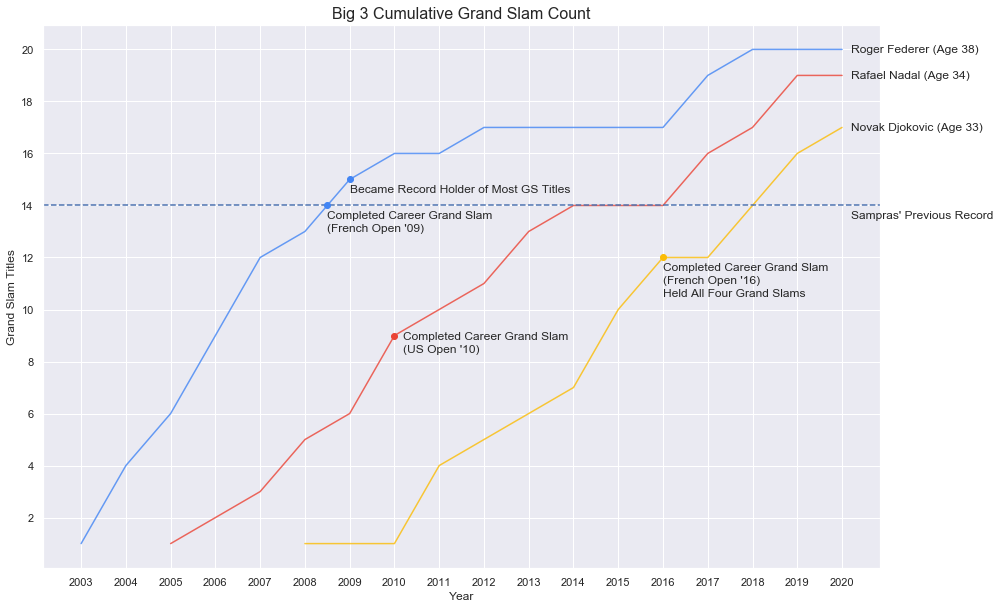

In [521]:
g1 = cumulative_lineplot_title_count("Novak Djokovic", title_type = "G", color = '#FBBC05')
g2 = cumulative_lineplot_title_count("Rafael Nadal", title_type = "G", color = '#EA4335')
g3 = cumulative_lineplot_title_count("Roger Federer", title_type = "G", color = '#4285F4')

plt.xticks(np.arange(2003, 2021, 1.0))
plt.yticks(np.arange(0, 22, 2.0))

plt.axhline(y = 14, xmax = 2019, linestyle = '--', label = "Pete Sampras")
plt.annotate("Sampras' Previous Record", xy = (2020.2, 13.5))

#federer annotations
#plt.annotate("Passed Sampras at Age 27", xy = (2009, 14.5))
plt.plot(2008.5, 14, marker="o", color = '#4285F4')
plt.annotate("Completed Career Grand Slam", xy = (2008.5, 13.5))
plt.annotate("(French Open '09)", xy = (2008.5, 13))
plt.plot(2009, 15, marker="o", color = '#4285F4')
plt.annotate("Became Record Holder of Most GS Titles", xy = (2009, 14.5))
plt.annotate("Roger Federer (Age 38)", xy = (2020.2, 19.9))
#nadal annotations
#plt.annotate("Passed Sampras at Age 31", xy = (2016.5, 14.5))
plt.plot(2010, 9, marker="o", color = '#EA4335')
plt.annotate("Completed Career Grand Slam", xy = (2010.2, 8.85))
plt.annotate("(US Open '10)", xy = (2010.2, 8.35))
plt.annotate("Rafael Nadal (Age 34)", xy = (2020.2, 18.9))
#djokovic annotations
#plt.annotate("Passed Sampras at Age 31", xy = (2018.5, 14.5))
plt.plot(2016, 12, marker="o", color = '#FBBC05')
plt.annotate("Completed Career Grand Slam", xy = (2016, 11.5))
plt.annotate("(French Open '16)", xy = (2016, 11))
plt.annotate("Held All Four Grand Slams", xy = (2016, 10.5))
plt.annotate("Novak Djokovic (Age 33)", xy = (2020.2, 16.9))
plt.title("Big 3 Cumulative Grand Slam Count", fontsize = 16)
plt.show()

In [522]:
def per_year_plot_title_count(player, title_type = None, color = None):
    player_df = pd.DataFrame()
    if title_type is not None:
        df = atpmatches[(atpmatches["winner_name"] == player) &  (atpmatches["tourney_level"] == title_type) &
                (atpmatches["round"] == "F")].groupby("year").agg({"tourney_name": 'count'}).reset_index()
        player_df = player_df.append(df)
    else:
        df = atpmatches[(atpmatches["winner_name"] == player) &
                (atpmatches["round"] == "F")].groupby("year").agg({"tourney_name": 'count'}).reset_index()
        player_df = player_df.append(df)
    #player_df = player_df.groupby("year").agg({"tourney_name": 'count'}).reset_index()
    
    player_df = player_df.groupby("year").agg({"tourney_name": sum}).reset_index()
    player_df["tourney_name"] = player_df["tourney_name"]
    #print(player_df)
    
    years = set(range(2003, 2021))
    #years = set(range(min(player_df["year"]), max(player_df["year"]) + 1))
    if len(years - set(player_df["year"])) > 0:
        for year in years - set(player_df["year"]):
                player_df = player_df.append({'year': year, 'tourney_name': 0, "Player": player}, ignore_index=True)
    player_df = player_df.sort_values("year").reset_index(drop=True)
    player_df["Player"] = player
    #print(player_df)
    if color is not None:
        sns.barplot(x = "year", y = 'tourney_name', data = player_df, color = color,
                   alpha =.5, linestyle = "-", linewidth = 3, edgecolor = color)
        
        #plt.fill_between(player_df.year.values, player_df.tourney_name.values, color = color, alpha=0.2)
    else:
        sns.lineplot(x = "year", y = 'tourney_name', data = player_df)
        #plt.fill_between(player_df.year.values, player_df.tourney_name.values, alpha=0.2)

In [297]:
def per_year_title_count(player, title_type = None):
    player_df = pd.DataFrame()
    if title_type is not None:
        df = atpmatches[(atpmatches["winner_name"] == player) &  (atpmatches["tourney_level"] == title_type) &
                (atpmatches["round"] == "F")].groupby("year").agg({"tourney_name": 'count'}).reset_index()
        player_df = player_df.append(df)
    else:
        df = atpmatches[(atpmatches["winner_name"] == player) &
                (atpmatches["round"] == "F")].groupby("year").agg({"tourney_name": 'count'}).reset_index()
        player_df = player_df.append(df)
    #player_df = player_df.groupby("year").agg({"tourney_name": 'count'}).reset_index()
    
    player_df = player_df.groupby("year").agg({"tourney_name": sum}).reset_index()
    player_df["tourney_name"] = player_df["tourney_name"]
    #print(player_df)
    
    years = set(range(2003, 2021))
    #years = set(range(min(player_df["year"]), max(player_df["year"]) + 1))
    if len(years - set(player_df["year"])) > 0:
        for year in years - set(player_df["year"]):
                player_df = player_df.append({'year': year, 'tourney_name': 0, "Player": player}, ignore_index=True)
    player_df = player_df.sort_values("year").reset_index(drop=True)
    player_df["Player"] = player
    #print(player_df)
    
        #plt.fill_between(player_df.year.values, player_df.tourney_name.values, alpha=0.2)
    return player_df

In [298]:
list(per_year_title_count("Novak Djokovic", title_type = "G")["tourney_name"].values)

[0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 1, 1, 3, 2, 0, 2, 2, 1]

### Treemap of Grand Slams Won

In [34]:
dataforsquare = atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["year"] > 2002) & 
                           (atpmatches["year"] <= 2020)]
dataforsquare = dataforsquare[~((dataforsquare["year"] == 2003) & 
                               (dataforsquare["tourney_name"].isin(["Australian Open", "Roland Garros"])))]
dataforsquare = dataforsquare[dataforsquare["round"] == "F"].groupby("winner_name").agg({"winner_id": 'count'}).reset_index()
dataforsquare = dataforsquare.append({"winner_name": "Other", "winner_id": 5}, ignore_index = True)
dataforsquare = dataforsquare[dataforsquare["winner_id"] > 1].sort_values("winner_id", ascending = False).reset_index(drop = True)
dataforsquare = dataforsquare.reindex([0, 1, 2, 4, 5, 3]).reset_index(drop = True)

In [35]:
percent = dataforsquare["winner_id"] / sum(dataforsquare["winner_id"]) * 100
percent.round(2)
dataforsquare["percent"] = " (" + percent.round(2).astype(str) + "%)"
dataforsquare

,winner_name,winner_id,percent
0,Roger Federer,20,(29.85%)
1,Rafael Nadal,19,(28.36%)
2,Novak Djokovic,17,(25.37%)
3,Andy Murray,3,(4.48%)
4,Stanislas Wawrinka,3,(4.48%)
5,Other,5,(7.46%)


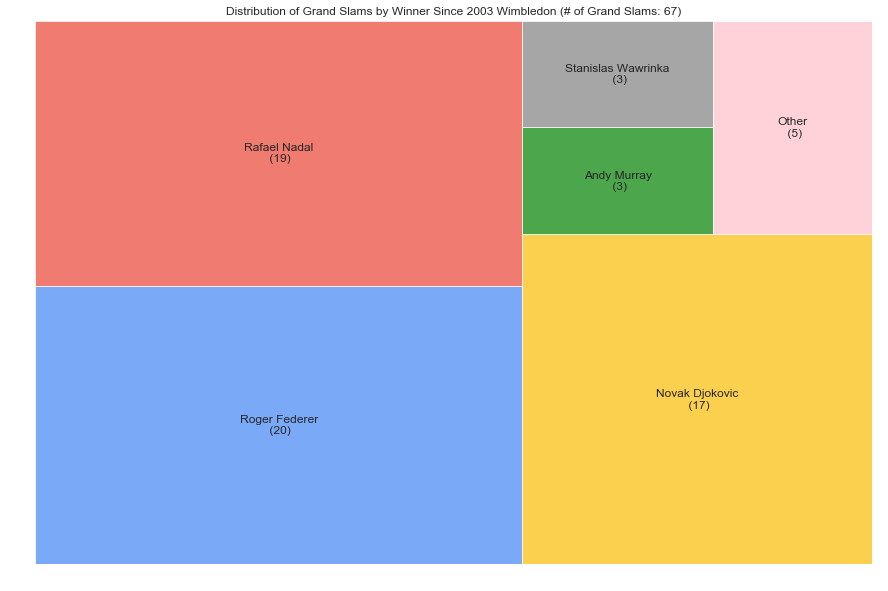

In [139]:
squarify.plot(sizes=dataforsquare['winner_id'], label=dataforsquare['winner_name'] + 
              "\n (" + dataforsquare["winner_id"].astype(str) + ")", 
              color=["#4285F4", "#EA4335",  "#FBBC05", "green", "gray", "pink"], alpha=.7 )
plt.axis('off')
plt.title("Distribution of Grand Slams by Winner Since 2003 Wimbledon (# of Grand Slams: 67)")
plt.show()

### Other Facts Supporting the Big 3's Dominance

There are a lot of achievements and accomplishments that we've already showcased. What we will do next is to more impressive feats that these three have almost normalized in today's game. This section will be later updated with visualizations.

#### Dominant Grand Slam Seasons

Most players are lucky to even win won grand slam in their career, so to have a season where you win multiple grand slams is very impressive, and winning 3 slams in a year is a herculean effort. We will look at seasons in the past where players won at least three grand slams.

In [595]:
gs_winners[gs_winners["winner_id"] > 2]

,year,winner_name,winner_id
4,1969,Rod Laver,4
21,1974,Jimmy Connors,3
64,1988,Mats Wilander,3
120,2004,Roger Federer,3
125,2006,Roger Federer,3
127,2007,Roger Federer,3
134,2010,Rafael Nadal,3
136,2011,Novak Djokovic,3
149,2015,Novak Djokovic,3


Since the Open Era began in 1968, before Federer, Nadal, and Djokovic, only three seasons showcased a player who won at least 3 grand slams in that calendar year. Since 2004 (in the past 16 full seasons), six such seasons have occured, three from Federer, one from Nadal, and two from Djokovic. Though there hasn't been a calendar grand slam (when someone wins all four in a year) since Rod Laver in 1969, winning three in a year is also an enormous feat. 

#### Trio Streaks

Another angle that we can look at is the number of grand slams consecutively won by any member of this trio. We can look at the highest number of consecutive slams won by any three people in the Open Era.

In [591]:
# use sliding window technique to get longest streak of grand slams won by 3 individuals
winners = atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["round"] == "F")][
    ["winner_name", "year", "tourney_name"]]
winners['tourney_name'] = pd.Categorical(winners['tourney_name'], gses)
winners = winners.sort_values(["year", "tourney_name"])
winner_list = list(winners["winner_name"])

In [587]:
def trio_streak(dframe, start = 1968, end = 2020):
    lst = list(dframe[(dframe["year"] >= start) & (dframe["year"] <= end)]["winner_name"])
    gs = dframe[(dframe["year"] >= start) & (dframe["year"] <= end)][["year", "tourney_name"]]
    maxTrio = 0
    start = 0
    max_dict = []
    trio_dict = {}
    max_start = 0
    max_end = 0
    for end in range(len(lst)):
        if lst[end] in trio_dict:
            trio_dict[lst[end]] += 1
        else:
            trio_dict[lst[end]] = 1
        while len(trio_dict) > 3:
            trio_dict[lst[start]] -= 1
            if trio_dict[lst[start]] == 0:
                del trio_dict[lst[start]]
            start += 1
        if maxTrio < end - start + 1:
            maxTrio = end - start + 1
            max_end = end
            max_start = start
            max_dict = list(trio_dict.keys())
    print("Between " + str(gs.iloc[max_start, :]["year"]) + " " + 
          str(gs.iloc[max_start, :]["tourney_name"]) + " and " + str(gs.iloc[max_end, :]["tourney_name"]) 
        + " " + str(gs.iloc[max_end, :]["year"]))
    return maxTrio, max_dict

In [593]:
print(trio_streak(winners))
print(trio_streak(winners, start = 1968, end = 2003))
print(trio_streak(winners, start = 2009))
print(trio_streak(winners, start = 2009, end = 2016))
print(trio_streak(winners, start = 2013, end = 2016))

Between 2005 Roland Garros and Wimbledon 2009
(18, ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'])
Between 1977 Roland Garros and Wimbledon 1979
(10, ['Guillermo Vilas', 'Bjorn Borg', 'Jimmy Connors'])
Between 2017 Australian Open and Australian Open 2020
(13, ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic'])
Between 2010 Australian Open and Wimbledon 2012
(11, ['Rafael Nadal', 'Roger Federer', 'Novak Djokovic'])
Between 2014 Wimbledon and Roland Garros 2016
(8, ['Novak Djokovic', 'Marin Cilic', 'Stan Wawrinka'])


From what we see here, the longest streak of grand slams won by a trio is 18 consecutive grand slams won by one of Federer, Nadal, and Djokovic, between the 2005 French Open and the 2009 Wimbledon Championships. An asterisk here is that Djokovic only won one grand slam during these 18. This was during Federer's dominant stretch over the tour, as well as the emergence of Nadal's all surface game, with Federer winning 11 of the 18, while Nadal won six.

However, if we look at the second highest streak by a trio in the Open Era, it is also accomplished by these three. But this time Djokovic takes up a more significant portion of the grand slams won. Out of the 13, he won five, while Nadal won five, and Federer won the other three.

The next highest streak, not surprisingly, was also from the Big 3. In this streak, from the 2010 Australian Open to the 2012 Wimbledon Championships, Nadal and Djokovic were coming off very dominant campaigns in 2010 and 2011 respectively. Nadal won five slams in that span, while Djokovic won four, and Federer won 2. 

To find the next highest streak, we would have to look back all the way to the late 1970s, where, between the 1977 French Open and the 1979 Wimbledon Championships, Bjorn Borg, Jimmy Connors, and Guillermo Vilas were the sole grand slam champions.

#### Unheard-of Longevity

Another characteristic that is unique to the Big 3 is their longevity; they've fought back many challengers from younger generations. Grigor Dimitrov, Milos Raonic, Kei Nishikori, and Marin Cilic, are now in/approaching their 30s,  and Dominic Thiem and Daniil Medvedev are the only players currently under 30 who have reached a grand slam final. Even in their 30s, their dominance is almost parallel to their dominance in their 20s (with the exception of Federer, who now has to fight both Father Time and his younger rivals).

Below we will take a look at all the grand slam events in the Open Era that were won by someone who was at least 30 years old.

In [321]:
over30 = atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["round"] == "F") & 
          (atpmatches["winner_age"] >= 30)][["year", "winner_name", "tourney_name"]]
over30

,year,winner_name,tourney_name
934,1968,Ken Rosewall,Roland Garros
1600,1969,Rod Laver,Australian Open
1727,1969,Rod Laver,Wimbledon
2034,1969,Rod Laver,US Open
2161,1969,Rod Laver,Roland Garros
3051,1970,Ken Rosewall,US Open
4530,1971,Ken Rosewall,Australian Open
7277,1972,Ken Rosewall,Australian Open
8274,1972,Andres Gimeno,Roland Garros
17885,1975,John Newcombe,Australian Open


In [406]:
print("Between 1968 and the 2016 US Open, which is " + str(4 * (2016 - 1968 + 1) + 3) + " Grand Slams, " +
      str(len(over30[(over30["year"] >= 1968) & (over30["year"] < 2016)])) + " were won by men 30+ years old.")
print("Since then, " + str(len(over30[(over30["year"] >= 2016)])) + " in a row have been won by men 30+ years old.")
print("However, 13 of those titles were won by... you guessed it: Federer, Nadal, Djokovic.")

Between 1968 and the 2016 US Open, which is 199 Grand Slams, 18 were won by men 30+ years old.
Since then, 14 in a row have been won by men 30+ years old.
However, 13 of those titles were won by... you guessed it: Federer, Nadal, Djokovic.


In [17]:
atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["round"] == "F") & 
          (atpmatches["loser_age"] >= 30)][["year", "winner_name", "loser_name", "tourney_name"]]

,year,winner_name,loser_name,tourney_name
1600,1969,Rod Laver,Andres Gimeno,Australian Open
2161,1969,Rod Laver,Ken Rosewall,Roland Garros
3514,1970,John Newcombe,Ken Rosewall,Wimbledon
7277,1972,Ken Rosewall,Mal Anderson,Australian Open
13369,1973,Ilie Nastase,Nikola Pilic,Roland Garros
14243,1974,Jimmy Connors,Ken Rosewall,US Open
17232,1974,Jimmy Connors,Ken Rosewall,Wimbledon
23532,1976,Mark Edmondson,John Newcombe,Australian Open
53400,1984,John McEnroe,Jimmy Connors,Wimbledon
78287,1991,Boris Becker,Ivan Lendl,Australian Open


In [18]:
atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["round"] == "F") & 
          (atpmatches["winner_age"] >= 30) & (atpmatches["loser_age"] >= 30)][
    ["year", "winner_name", "loser_name", "tourney_name"]]

,year,winner_name,loser_name,tourney_name
1600,1969,Rod Laver,Andres Gimeno,Australian Open
2161,1969,Rod Laver,Ken Rosewall,Roland Garros
7277,1972,Ken Rosewall,Mal Anderson,Australian Open
119740,2002,Pete Sampras,Andre Agassi,US Open
163842,2017,Roger Federer,Rafael Nadal,Australian Open
164931,2017,Rafael Nadal,Stanislas Wawrinka,Roland Garros
165779,2017,Rafael Nadal,Kevin Anderson,US Open
168118,2018,Novak Djokovic,Kevin Anderson,Wimbledon
169222,2019,Novak Djokovic,Rafael Nadal,Australian Open
170585,2019,Novak Djokovic,Roger Federer,Wimbledon


## Beating Big 3 in Grand Slam

This will have the beginning works of a deeper analysis on the Big 3, particularly on those who beat them. I remember a commentator once noting that when you beat one of them in a tournament, it's very hard to follow that up. Let's look into that statement, what it entails, and the validity of it.

Just like any other tennis player, Federer, Nadal and Djokovic needed to develop and grow into the superstars that they are today. Defining the moment they became a superstar is a completely different potential analysis project, so we will arbitrarily look at losses after they won their 5th Grand Slam.

In [57]:
big3loss = atpmatches[(atpmatches["loser_name"].isin(["Novak Djokovic", "Roger Federer", "Rafael Nadal"])) & (
            atpmatches["tourney_level"] == "G")][["year", "tourney_name", "winner_name", "loser_name", "round", "score"]]

In [65]:
atpmatches[(atpmatches["year"] == big3loss.iloc[0]["year"]) & (
    atpmatches["tourney_name"] == big3loss.iloc[0]["tourney_name"]) & (
    atpmatches["loser_name"] == big3loss.iloc[0]["winner_name"])][["year", "tourney_name", "winner_name", "loser_name", "round", "score"]]

,year,tourney_name,winner_name,loser_name,round,score
109446,1999,Wimbledon,Todd Martin,Jiri Novak,R64,7-6(5) 6-4 6-4


In [72]:
date = atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["round"] == "F") & 
           (atpmatches["winner_name"] == "Roger Federer")].iloc[4]["tourney_date"]

In [76]:
ws = atpmatches[(atpmatches["tourney_date"] > date) & (~atpmatches["round"].isin(["RR", "F"])) &
          (atpmatches["loser_name"] == "Roger Federer")][["year", "tourney_name", "winner_name", "loser_name", "round", "score"]]

,year,tourney_name,winner_name,loser_name,round,score
132191,2006,Cincinnati Masters,Andy Murray,Roger Federer,R32,7-5 6-4
134310,2007,Rome Masters,Filippo Volandri,Roger Federer,R16,6-2 6-4
134528,2007,Paris Masters,David Nalbandian,Roger Federer,R16,6-4 7-6(3)
135785,2007,Indian Wells Masters,Guillermo Canas,Roger Federer,R64,7-5 6-2
135928,2007,Miami Masters,Guillermo Canas,Roger Federer,R16,7-6(2) 2-6 7-6(5)
136821,2008,Beijing Olympics,James Blake,Roger Federer,QF,6-4 7-6(2)
137183,2008,Madrid Masters,Andy Murray,Roger Federer,SF,3-6 6-3 7-5
137410,2008,Cincinnati Masters,Ivo Karlovic,Roger Federer,R16,7-6(6) 4-6 7-6(5)
137449,2008,Canada Masters,Gilles Simon,Roger Federer,R32,2-6 7-5 6-4
138024,2008,Rome Masters,Radek Stepanek,Roger Federer,QF,7-6(4) 7-6(7)


In [89]:
ws = atpmatches[(atpmatches["tourney_date"] > date) & (~atpmatches["round"].isin(["RR", "F"])) &
          (atpmatches["loser_name"] == "Roger Federer")][["year", "tourney_name", "winner_name", "loser_name", "round", "score"]]

In [93]:
end_result = []
lost_to = []

for index, row in ws.iterrows():
    res = atpmatches[(atpmatches["tourney_name"] == row["tourney_name"]) & (atpmatches["loser_name"] == row["winner_name"])
              & (atpmatches["year"] == row["year"]) & (~atpmatches["round"].isin(["RR"]))][
        ["year", "tourney_name", "winner_name", "loser_name", "round", "score"]]
    if len(res) == 0:
        end_result.append("W")
        lost_to.append("None")
    else:
        end_result.append(res["round"].values[0])
        lost_to.append(res["winner_name"].values[0])

ws["End result"] = end_result
ws["Lost to"] = lost_to
ws

,year,tourney_name,winner_name,loser_name,round,score,End result,Lost to
132191,2006,Cincinnati Masters,Andy Murray,Roger Federer,R32,7-5 6-4,QF,Andy Roddick
134310,2007,Rome Masters,Filippo Volandri,Roger Federer,R16,6-2 6-4,SF,Fernando Gonzalez
134528,2007,Paris Masters,David Nalbandian,Roger Federer,R16,6-4 7-6(3),W,None
135785,2007,Indian Wells Masters,Guillermo Canas,Roger Federer,R64,7-5 6-2,R32,Carlos Moya
135928,2007,Miami Masters,Guillermo Canas,Roger Federer,R16,7-6(2) 2-6 7-6(5),F,Novak Djokovic
136821,2008,Beijing Olympics,James Blake,Roger Federer,QF,6-4 7-6(2),SF,Fernando Gonzalez
137183,2008,Madrid Masters,Andy Murray,Roger Federer,SF,3-6 6-3 7-5,W,None
137410,2008,Cincinnati Masters,Ivo Karlovic,Roger Federer,R16,7-6(6) 4-6 7-6(5),SF,Andy Murray
137449,2008,Canada Masters,Gilles Simon,Roger Federer,R32,2-6 7-5 6-4,SF,Nicolas Kiefer
138024,2008,Rome Masters,Radek Stepanek,Roger Federer,QF,7-6(4) 7-6(7),SF,Novak Djokovic
